# Reporting on sales data

Now let's now move on to the competition and challenge.

## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data
The team assembled the following file:

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

### **Reading in the sales data**

In [1]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(install.packages("corrplot"))

df <- readr::read_csv('data/sales_data.csv', show_col_types = FALSE)

head(df,5)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/corrplot_0.92.tar.gz' ...
	OK [downloaded 3.7 Mb in 0.1 secs]
Installing corrplot [0.92] ...
	OK [installed binary]
Moving corrplot [0.92] into the cache ...
	OK [moved to cache in 0.41 milliseconds]


date,warehouse,client_type,product_line,quantity,unit_price,total,payment
<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


 ### **Knowing the data and Checking for NA values**

#### Features in dataset

In [2]:
df  %>% glimpse()

df  %>% str()

Rows: 1,000
Columns: 8
$ date         <date> 2021-06-01, 2021-06-01, 2021-06-01, 2021-06-01, 2021-06-…
$ warehouse    <chr> "Central", "North", "North", "North", "Central", "North",…
$ client_type  <chr> "Retail", "Retail", "Retail", "Wholesale", "Retail", "Who…
$ product_line <chr> "Miscellaneous", "Breaking system", "Suspension & tractio…
$ quantity     <dbl> 8, 9, 8, 16, 2, 40, 2, 10, 40, 6, 6, 6, 6, 9, 10, 2, 1, 6…
$ unit_price   <dbl> 16.85, 19.29, 32.93, 37.84, 60.48, 37.37, 27.20, 22.44, 3…
$ total        <dbl> 134.83, 173.61, 263.45, 605.44, 120.96, 1494.80, 54.41, 2…
$ payment      <chr> "Credit card", "Cash", "Credit card", "Transfer", "Credit…
spec_tbl_df [1,000 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ date        : Date[1:1000], format: "2021-06-01" "2021-06-01" ...
 $ warehouse   : chr [1:1000] "Central" "North" "North" "North" ...
 $ client_type : chr [1:1000] "Retail" "Retail" "Retail" "Wholesale" ...
 $ product_line: chr [1:1000] "Miscellaneous" "Breaking system"

#### Descriptive stats on variables are not of type character.

    quantity        unit_price        total        
 Min.   : 1.000   Min.   :10.03   Min.   :  10.35  
 1st Qu.: 4.000   1st Qu.:21.09   1st Qu.:  93.69  
 Median : 6.500   Median :28.57   Median : 178.36  
 Mean   : 9.395   Mean   :30.32   Mean   : 289.11  
 3rd Qu.:10.000   3rd Qu.:37.92   3rd Qu.: 321.69  
 Max.   :40.000   Max.   :66.62   Max.   :2546.33  

corrplot 0.92 loaded



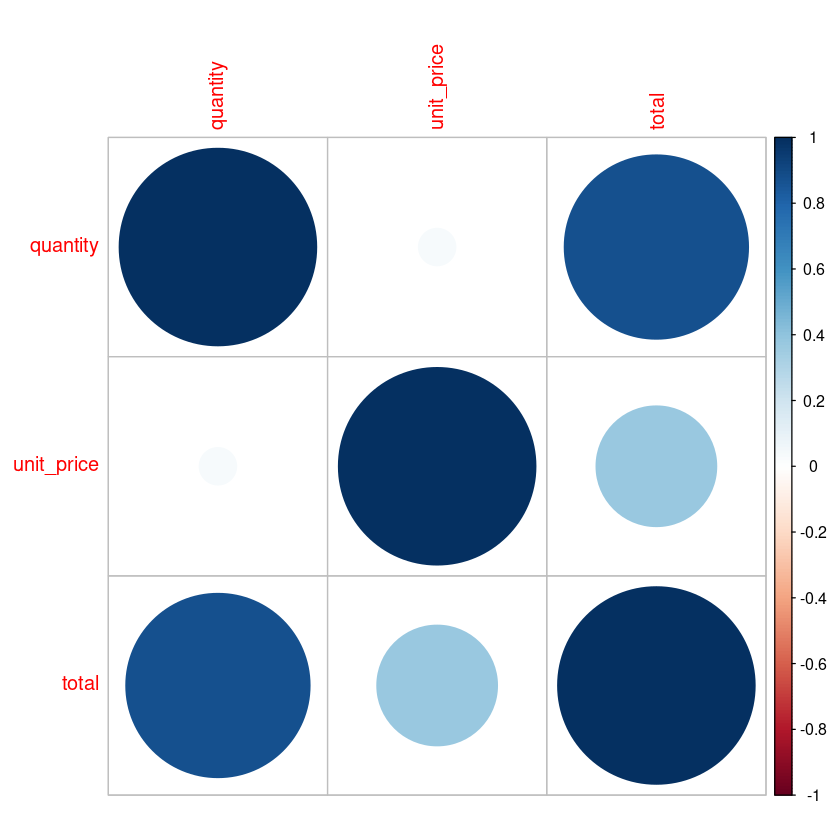

In [3]:
df  %>% select(where(is.numeric)) %>% summary()


library(corrplot)

df  %>% select(where(is.numeric)) %>% cor() %>% corrplot()

#### Checking for NA values of each variables




In [13]:

for (i in colnames(df)) {
 	x <- df %>% is.na() %>% sum()
    if(x > 0) 
    print(paste(i,"->"," NA =",x))
    if(x <= 0)
         print("Not NA")
        break
     }

any(!complete.cases(df))

df %>% vapply(function(x){x %>% is.na() %>% sum()}, numeric(1))
df %>% select(-date) %>% sapply(function(x){any(!is.na(x) & x == "")})

[1] "Not NA"


[1] FALSE

date    warehouse  client_type product_line     quantity   unit_price 
           0            0            0            0            0            0 
       total      payment 
           0            0

warehouse  client_type product_line     quantity   unit_price        total 
       FALSE        FALSE        FALSE        FALSE        FALSE        FALSE 
     payment 
       FALSE

 ### **Total sales for each payment method**  
 
What are the total sales for each payment method?

payment,total_sales
<chr>,<dbl>
Cash,19199.1
Credit card,110271.6
Transfer,159642.3


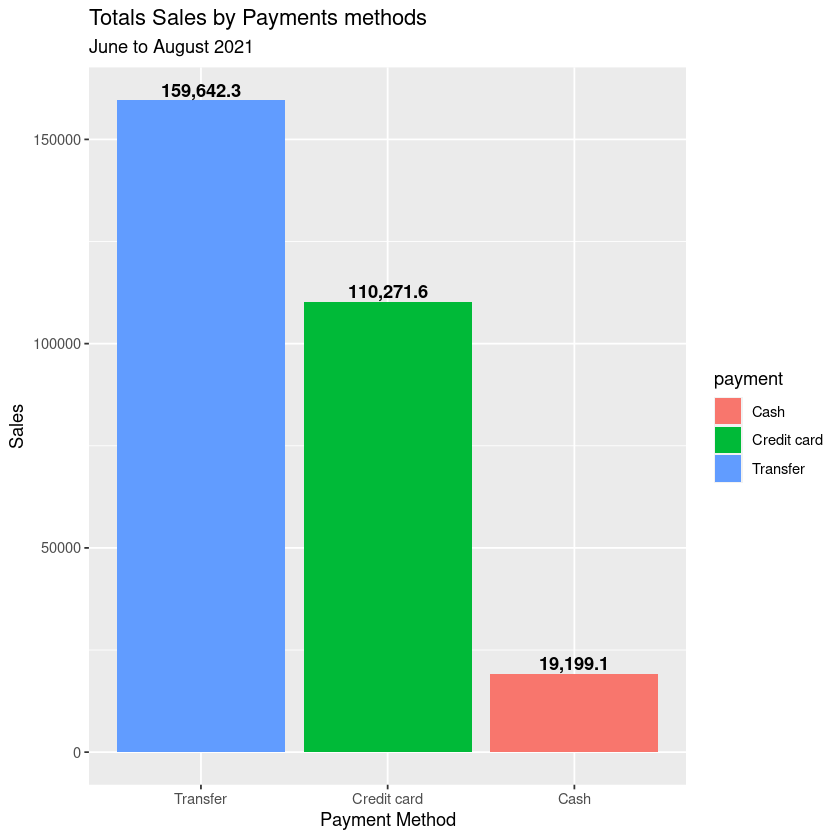

In [5]:
df_sales_payment <- df %>% 
group_by(payment) %>% 
summarise(total_sales = sum(total))

head(df_sales_payment)

#1.3
ggplot(df_sales_payment,
       aes(reorder(payment, -total_sales), total_sales)) +
geom_col(
    aes(fill = payment)) + 
geom_text(
        aes(label = scales::label_comma(accuracy = .1)(total_sales)),
        position = position_dodge(width = 0.9),
        vjust = -0.25,
        fontface = 2)+
ggtitle("Totals Sales by Payments methods","June to August 2021") +
labs(x = "Payment Method", y = "Sales")

 ### **Average unit price for each product line**  
What is the average unit price for each product line?

product_line,Avg_price
<chr>,<dbl>
Breaking system,17.74052
Electrical system,25.58513
Engine,60.09180
Frame & body,42.83223
Miscellaneous,22.81074
Suspension & traction,33.96987


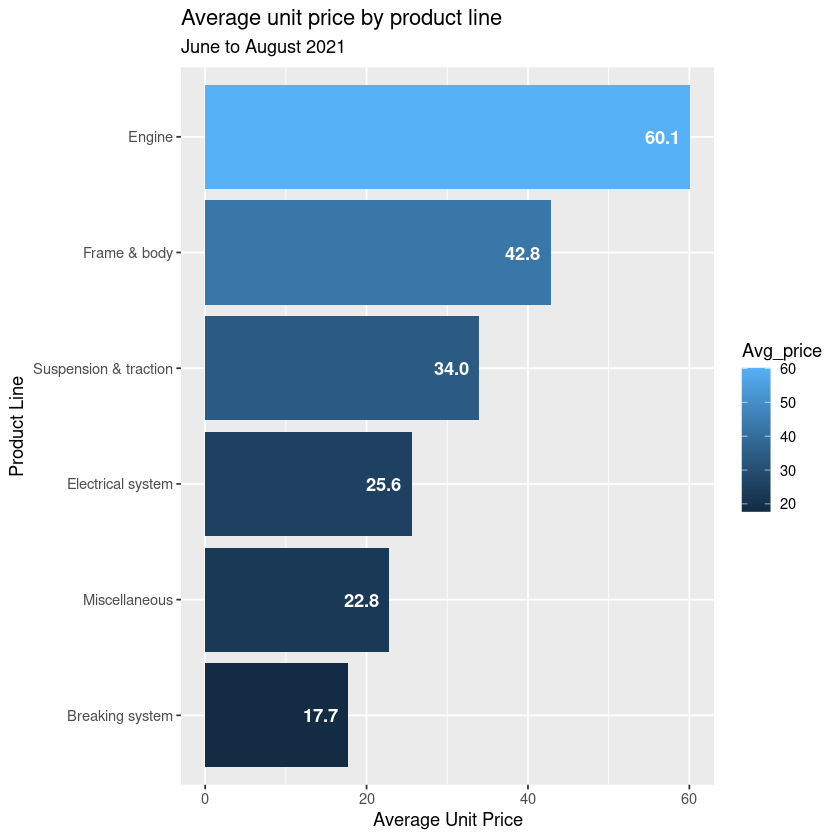

In [6]:
df_mean_product <- df %>% 
group_by(product_line) %>% 
summarise(Avg_price = mean(unit_price))

head(df_mean_product)

#2.3
ggplot(df_mean_product,
       aes(reorder(product_line,Avg_price), Avg_price)) +
geom_col(
    aes(fill = Avg_price)) + 
coord_flip()+
geom_text(
        aes(label = format(Avg_price, digits = 3)),
        position = position_dodge(width = 0.9),
        hjust = 1.3,
        color = 'white',
        fontface = 2) + 
ggtitle("Average unit price by product line","June to August 2021") +
labs(x = "Product Line", y = "Average Unit Price")

### [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)

### Average purchase value by client type

client_type,Avg_Purchase
<chr>,<dbl>
Retail,167.0589
Wholesale,709.5215


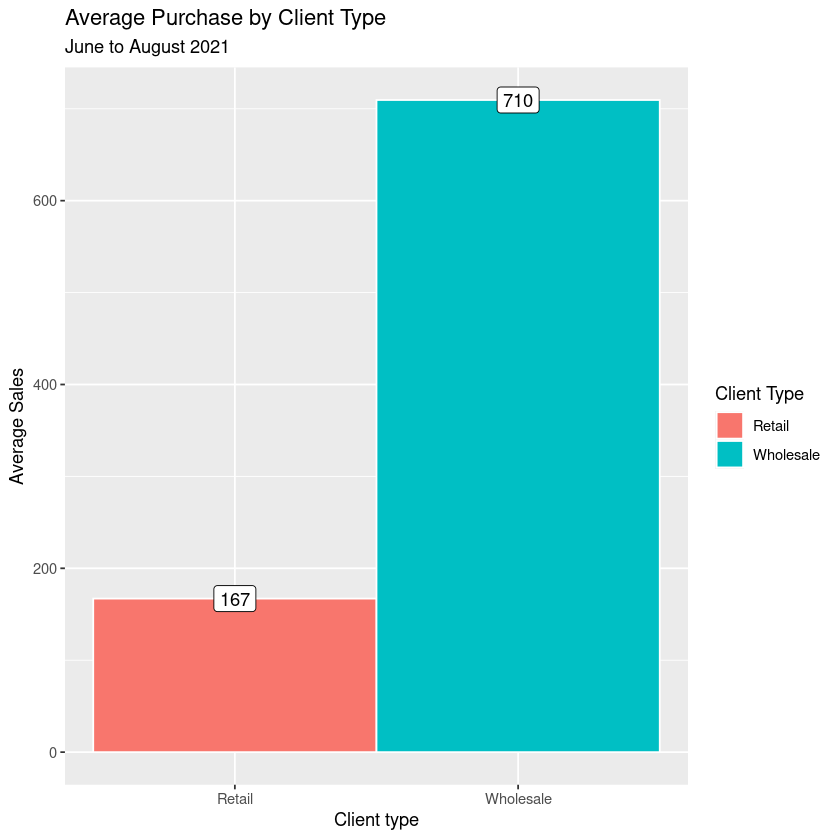

In [7]:
df_purchase_client <- df %>% 
group_by(client_type) %>% 
summarise(Avg_Purchase = mean(total))

head(df_purchase_client)

ggplot(df_purchase_client,
      aes(x = reorder(client_type,Avg_Purchase), y = Avg_Purchase, fill = client_type)) +
geom_bar(stat = 'identity', width = 1, color = "white")+
geom_label(aes(label = round(Avg_Purchase)), fill = "white")+
ggtitle("Average Purchase by Client Type","June to August 2021") +
labs(x = "Client type", y = "Average Sales")+
scale_fill_discrete(name = "Client Type")


### **Total Purchase value by Product Line**

product_line,total_sales,percentage
<chr>,<dbl>,<dbl>
Suspension & traction,73014.21,25.254558
Frame & body,69024.73,23.874655
Electrical system,43612.71,15.085005
Breaking system,38350.15,13.264762
Engine,37945.38,13.124757
Miscellaneous,27165.82,9.396264


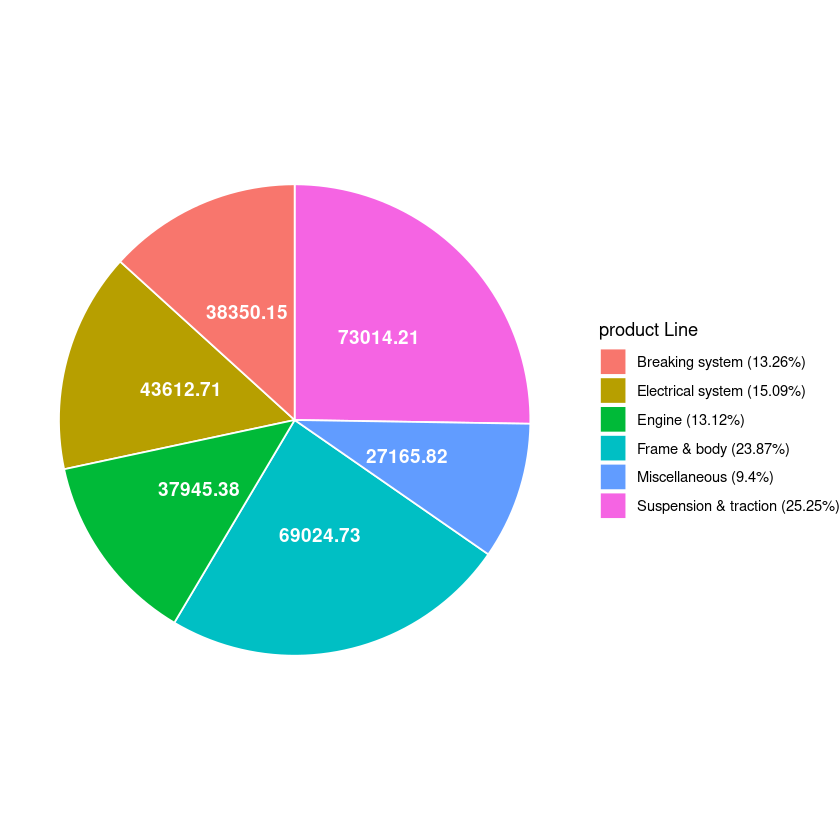

In [8]:
df_sales_productline <- df %>% 
group_by(product_line) %>% 
summarise(total_sales = sum(total)) %>%
mutate(percentage = total_sales/sum(total_sales)*100) %>%
mutate(PL_percentage = paste0(product_line,' (', round(percentage, digits = 2), '%)')) %>%
arrange(desc(percentage))

df_sales_productline %>% 
select(-PL_percentage)  %>%
head()

ggplot(df_sales_productline,
    aes(x = "", y = total_sales, fill = PL_percentage)) +
  geom_bar(stat = 'identity', width = 1, color = "white") +
  coord_polar("y", start = 0) +
  theme_void() +
  scale_fill_discrete(name = "product Line") +
  geom_text(aes(label = total_sales)
            , position = position_stack(vjust = 0.5)
            , size = 4
            , colour = "white"
            , fontface = 2)



### **Total Sales value by Month**

month,total_sales
<chr>,<dbl>
June,95320.03
July,93547.91
August,100245.06


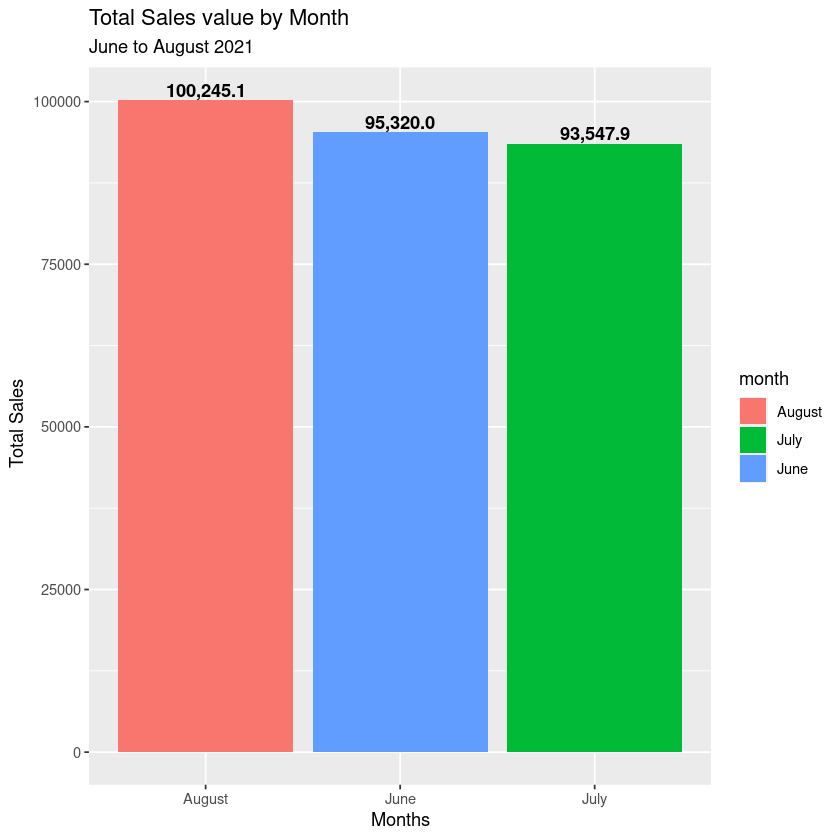

In [9]:
df_sales_month <- df %>%
    mutate(month = months(date)) %>%
    group_by(month) %>%
    summarize(total_sales = sum(total)) %>%
	arrange(desc(month))

head(df_sales_month)

ggplot(df_sales_month,
       aes(reorder(month,-total_sales),total_sales)) +
geom_col(
    aes(fill = month)) + 
geom_text(
        aes(label = scales::label_comma(accuracy = .1)(total_sales)),
        position = position_dodge(width = 0.9),
        vjust = -0.25,
        fontface = 2)+
ggtitle("Total Sales value by Month","June to August 2021") +
labs(x = "Months", y = " Total Sales")



In conclusion, 

- We found that Transfers is the most commonly used payment method . 

- In average, the product line of Breaking system has the lowest unit price , however  the product line of Engine has the highest price and shows a purchase amount of the 13.12 percent from overall purchases.

- In average, purchase value by client type is greater for wholesale(710) than retail(167).

- Suspension and Traction is having highest Total Purchase value for a 25.25 percent and 73,014.21 amount.

## Analysis is stil in progress!!!